In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file 

## Load dataset

In [8]:
N_FEATURES = 123

X_train, y_train = load_svmlight_file('dataset/a9a', n_features=N_FEATURES)
X_val, y_val = load_svmlight_file('dataset/a9a.t', n_features=N_FEATURES)

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)

y_train[y_train == -1] = 0
y_val[y_val == -1] = 0

## Hyper-parameters

In [9]:
EPOCH_NUM = 300
BATCH_SIZE = 32
LR = 3e-4
PENALTY_FACTOR = 0.4

## Log-likehood Loss function

$ J(w) = -\frac{1}{n}[\sum_{i=1}^{n}y_i \log g(h_w(x_i)) + (1-y_i)\log(1-g(h_w(x_i)))]$

$ \nabla_w J(w) = -y\cdot\frac{1}{h_w(x)}\cdot\frac{\partial h_w(x)}{\partial w}+(1-y)\cdot\frac{1}{1-h_w(x)}\cdot\frac{\partial h_w(x)}{\partial w}$

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y_, y):
    return -1/y.shape[0] * (y*np.log(sigmoid(y_)) + (1-y)*np.log(1-sigmoid(y_))).sum()

## Initialize parameter $w$ with normal distribution

In [11]:
w = np.random.normal(1, 1, size=(N_FEATURES, 1))

## Train

In [12]:
batch_idxs_pool = np.arange(X_train.shape[0])

losses_train, losses_val = [], []
accs_train, accs_val = [], []

for epoch in range(EPOCH_NUM):
    for step in range(X_train.shape[0] // BATCH_SIZE):
        batch_idx = np.random.choice(batch_idxs_pool, size=BATCH_SIZE)
        X, y = X_train[batch_idx], y_train[batch_idx]
        
        grad = X.T.dot(sigmoid(X.dot(w))-y) # + PENALTY_FACTOR*w
        grad = -grad / X.shape[0]
        
        w += LR * grad
    
    output_train, output_val = X_train.dot(w), X_val.dot(w)
    
    losses_train.append(loss(output_train, y_train))
    losses_val.append(loss(output_val, y_val))
    
    output_train[sigmoid(output_train) > 0.5] = 1
    output_train[sigmoid(output_train) <= 0.5] = 0
    
    output_val[sigmoid(output_val) > 0.5] = 1
    output_val[sigmoid(output_val) <= 0.5] = 0
    
    accs_train.append(np.count_nonzero(output_train == y_train)/X_train.shape[0])
    accs_val.append(np.count_nonzero(output_val == y_val)/X_val.shape[0])
    
    print('Epoch: #{}\tLoss_train: {:.4f}\tLoss_val: {:.4f}\tAcc_train: {:.4f}\tAcc_val: {:.4f}'.format(
        epoch+1, losses_train[-1], losses_val[-1], accs_train[-1], accs_val[-1])
    )
        

Epoch: #1	Loss_train: 8.6930	Loss_val: 8.6894	Acc_train: 0.2408	Acc_val: 0.2362
Epoch: #2	Loss_train: 7.6008	Loss_val: 7.5912	Acc_train: 0.2408	Acc_val: 0.2362
Epoch: #3	Loss_train: 6.5186	Loss_val: 6.5038	Acc_train: 0.2414	Acc_val: 0.2376
Epoch: #4	Loss_train: 5.4560	Loss_val: 5.4373	Acc_train: 0.2449	Acc_val: 0.2419
Epoch: #5	Loss_train: 4.4427	Loss_val: 4.4220	Acc_train: 0.2571	Acc_val: 0.2556
Epoch: #6	Loss_train: 3.5256	Loss_val: 3.5051	Acc_train: 0.2911	Acc_val: 0.2906
Epoch: #7	Loss_train: 2.7618	Loss_val: 2.7434	Acc_train: 0.3413	Acc_val: 0.3445
Epoch: #8	Loss_train: 2.1723	Loss_val: 2.1563	Acc_train: 0.4008	Acc_val: 0.4046
Epoch: #9	Loss_train: 1.7490	Loss_val: 1.7348	Acc_train: 0.4595	Acc_val: 0.4618
Epoch: #10	Loss_train: 1.4648	Loss_val: 1.4519	Acc_train: 0.5123	Acc_val: 0.5150
Epoch: #11	Loss_train: 1.2792	Loss_val: 1.2673	Acc_train: 0.5526	Acc_val: 0.5618
Epoch: #12	Loss_train: 1.1580	Loss_val: 1.1469	Acc_train: 0.5821	Acc_val: 0.5912
Epoch: #13	Loss_train: 1.0772	Loss_va

Epoch: #103	Loss_train: 0.5755	Loss_val: 0.5728	Acc_train: 0.7676	Acc_val: 0.7651
Epoch: #104	Loss_train: 0.5736	Loss_val: 0.5709	Acc_train: 0.7680	Acc_val: 0.7654
Epoch: #105	Loss_train: 0.5717	Loss_val: 0.5690	Acc_train: 0.7686	Acc_val: 0.7661
Epoch: #106	Loss_train: 0.5698	Loss_val: 0.5671	Acc_train: 0.7693	Acc_val: 0.7665
Epoch: #107	Loss_train: 0.5680	Loss_val: 0.5653	Acc_train: 0.7699	Acc_val: 0.7670
Epoch: #108	Loss_train: 0.5663	Loss_val: 0.5636	Acc_train: 0.7706	Acc_val: 0.7676
Epoch: #109	Loss_train: 0.5646	Loss_val: 0.5618	Acc_train: 0.7709	Acc_val: 0.7683
Epoch: #110	Loss_train: 0.5628	Loss_val: 0.5601	Acc_train: 0.7711	Acc_val: 0.7687
Epoch: #111	Loss_train: 0.5611	Loss_val: 0.5584	Acc_train: 0.7717	Acc_val: 0.7694
Epoch: #112	Loss_train: 0.5593	Loss_val: 0.5567	Acc_train: 0.7722	Acc_val: 0.7700
Epoch: #113	Loss_train: 0.5577	Loss_val: 0.5550	Acc_train: 0.7727	Acc_val: 0.7703
Epoch: #114	Loss_train: 0.5560	Loss_val: 0.5533	Acc_train: 0.7729	Acc_val: 0.7707
Epoch: #115	Loss

Epoch: #203	Loss_train: 0.4557	Loss_val: 0.4532	Acc_train: 0.8011	Acc_val: 0.8014
Epoch: #204	Loss_train: 0.4549	Loss_val: 0.4525	Acc_train: 0.8013	Acc_val: 0.8016
Epoch: #205	Loss_train: 0.4542	Loss_val: 0.4517	Acc_train: 0.8016	Acc_val: 0.8019
Epoch: #206	Loss_train: 0.4535	Loss_val: 0.4510	Acc_train: 0.8018	Acc_val: 0.8020
Epoch: #207	Loss_train: 0.4528	Loss_val: 0.4503	Acc_train: 0.8021	Acc_val: 0.8021
Epoch: #208	Loss_train: 0.4520	Loss_val: 0.4496	Acc_train: 0.8024	Acc_val: 0.8022
Epoch: #209	Loss_train: 0.4513	Loss_val: 0.4488	Acc_train: 0.8026	Acc_val: 0.8026
Epoch: #210	Loss_train: 0.4506	Loss_val: 0.4481	Acc_train: 0.8027	Acc_val: 0.8027
Epoch: #211	Loss_train: 0.4499	Loss_val: 0.4474	Acc_train: 0.8028	Acc_val: 0.8030
Epoch: #212	Loss_train: 0.4492	Loss_val: 0.4467	Acc_train: 0.8029	Acc_val: 0.8031
Epoch: #213	Loss_train: 0.4485	Loss_val: 0.4461	Acc_train: 0.8031	Acc_val: 0.8031
Epoch: #214	Loss_train: 0.4478	Loss_val: 0.4454	Acc_train: 0.8031	Acc_val: 0.8033
Epoch: #215	Loss

## Visualization

### Losses

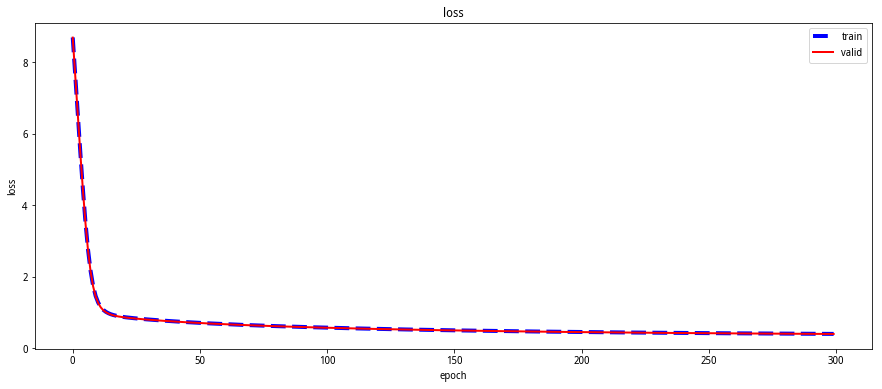

In [13]:
plt.figure(figsize=[15,6])
plt.title('loss')
plt.plot(losses_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('logistics-regression-losses.png')
plt.show()

### Accuracy

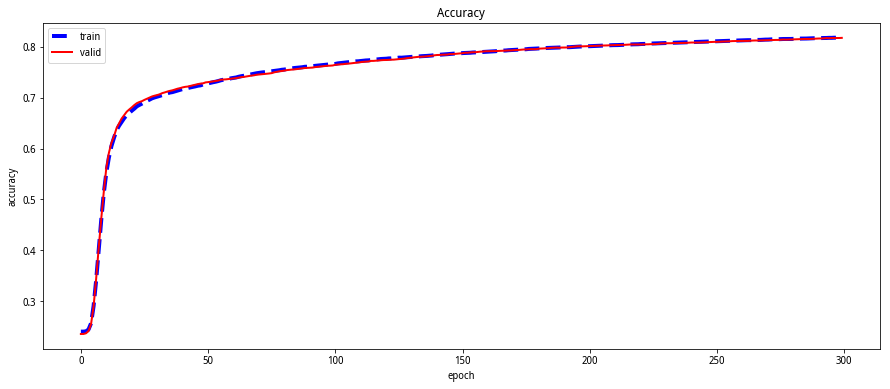

In [14]:
plt.figure(figsize=[15,6])
plt.title('Accuracy')
plt.plot(accs_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accs_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('logistics-regression-accuracy.png')
plt.show()